<a href="https://colab.research.google.com/github/AnamHJ24/datascience-python-challenges/blob/main/notebooks/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 14 - Starbucks
You are a Business Analyst on the Starbucks Rewards team investigating customer transaction behavior. Your team wants to understand how loyalty program membership influences purchasing patterns. The goal is to compare transaction metrics between loyalty members and non-members.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data files
url_1 = "https://raw.githubusercontent.com/AnamHJ24/datascience-python-challenges/refs/heads/main/Data/Day_14_1.txt"
url_2 = "https://raw.githubusercontent.com/AnamHJ24/datascience-python-challenges/refs/heads/main/Data/Day_14_2.txt"
fct_transactions = pd.read_csv(url_1)
dim_customers = pd.read_csv(url_2)

fct_transactions.head()

,customer_id,transaction_id,transaction_date,transaction_value
0,1,101,2024-07-05,5.50
1,1,102,2024-07-15,7.25
2,2,103,2024-07-10,4.00
3,3,104,2024-07-20,8.75
4,4,105,2024-07-03,6.50


In [3]:
dim_customers.head()

,customer_id,is_loyalty_member
0,1,True
1,2,False
2,3,True
3,4,False
4,5,True


## Question 1
For the month of July 2024, how many transactions did loyalty program members and non-members make? Compare the transaction counts between these two groups.

## Solution

In [4]:
# Convert required column to datetime
fct_transactions['transaction_date'] = pd.to_datetime(fct_transactions['transaction_date'])

# Filter July 2024 data
july_2024 = fct_transactions[
  (fct_transactions['transaction_date'].dt.year == 2024) &
  (fct_transactions['transaction_date'].dt.month == 7)
]

# Merge the dataframes
merged = july_2024.merge(
  dim_customers[['customer_id','is_loyalty_member']],
  on = 'customer_id',
  how = 'left'
)

# Count number of transaction made by members and non-menbers
transaction_counts = merged['is_loyalty_member'].value_counts().reset_index()
transaction_counts.columns = ['is_loyalty_member', 'transaction_count']

# Calculate percentage for comparison
total_transactions = transaction_counts['transaction_count'].sum()
transaction_counts['percentage'] = (transaction_counts['transaction_count']/total_transactions) *100

print("Transactions counts for July 2024:\n")
print(transaction_counts)

Transactions counts for July 2024:

   is_loyalty_member  transaction_count  percentage
0               True                 10        62.5
1              False                  6        37.5


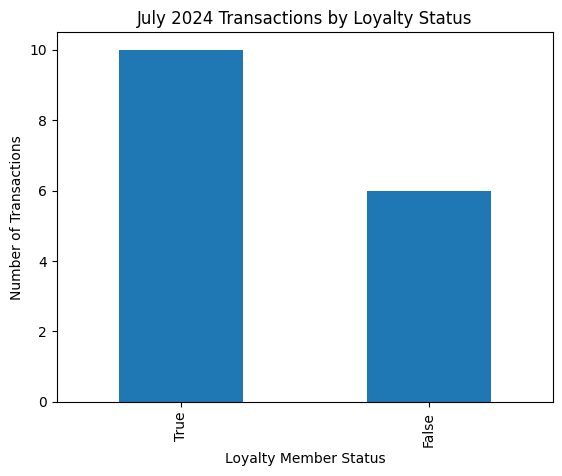

In [5]:
# Compare with a bar chart
transaction_counts.set_index('is_loyalty_member')['transaction_count'].plot(
    kind='bar',
    title = 'July 2024 Transactions by Loyalty Status',
    xlabel = 'Loyalty Member Status',
    ylabel= 'Number of Transactions'
)
plt.show()

## Question 2
What is the average transaction value for loyalty program members and non-members during July 2024? Use this to identify which group has a higher average transaction value.

## Solution

In [6]:
# Calculate average transaction sort_values
avg_transaction = merged.groupby('is_loyalty_member')['transaction_value'].mean().reset_index()
avg_transaction.columns = ['is_loyalty_member','avg_transaction_value']
avg_transaction['avg_transaction_value'] = avg_transaction['avg_transaction_value'].round(2)
print('Avergae Transaction Values for July 2024:')
print(avg_transaction)

Avergae Transaction Values for July 2024:
   is_loyalty_member  avg_transaction_value
0              False                   4.92
1               True                   8.80


In [7]:
# Determine which group has higher average
higher_group = avg_transaction.loc[avg_transaction['avg_transaction_value'].idxmax(), 'is_loyalty_member']
higher_value = avg_transaction['avg_transaction_value'].max()
print(f"The {'loyalty members' if higher_group else 'non-members'} group has a higher average transaction value of ${higher_value:.2f}")

The loyalty members group has a higher average transaction value of $8.80


## Question 3
Determine the percentage difference in average transaction value between loyalty program members and non-members for July 2024.

## Solution

In [9]:
# Extract average values
loyalty_avg = avg_transaction[avg_transaction['is_loyalty_member'] == True]['avg_transaction_value'].values[0]
no_loyalty_avg = avg_transaction[avg_transaction['is_loyalty_member'] == False]['avg_transaction_value'].values[0]

# Calculate percentage difference
percentage_diff = ((loyalty_avg-no_loyalty_avg)/no_loyalty_avg)*100

print("Loyalty members average transaction: $",round(loyalty_avg,2))
print("Non-loyalty members average transaction: $",round(no_loyalty_avg, 2))
print("Loyalty members spend ",round(percentage_diff,2),"% more than non-loyalty members.")


Loyalty members average transaction: $ 8.8
Non-loyalty members average transaction: $ 4.92
Loyalty members spend  78.86 % more than non-loyalty members.
